In [ ]:
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Checking version of Tensorflow ans Keras
print(f"Tensor flow version {tf.__version__}")
print(f"keras flow version {tf.keras.__version__}")

Tensor flow version 2.10.0
keras flow version 2.10.0


In [ ]:
Q2. Load the Wine Quality dataset and explore its dimensions

In [4]:
df=pd.read_csv("wine.csv")
df.shape

(1599, 12)

In [5]:
df=df.drop_duplicates()

In [6]:
df.quality.value_counts()

good    719
bad     640
Name: quality, dtype: int64

In [5]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad


In [ ]:
Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 138.0+ KB


In [8]:
df.quality.replace(['bad', 'good'],[0, 1], inplace=True)

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
Q4. Separate the features and target variables from the dataframe.

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y=df['quality']

In [14]:
y=pd.DataFrame(y)
y

,quality
0,0
1,0
2,0
3,1
5,0
...,...
1593,1
1594,0
1595,1
1597,0


In [ ]:
Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [17]:
X_train.shape,X_val.shape,X_test.shape

((869, 11), (218, 11), (272, 11))

In [18]:
y_train.shape,y_val.shape,y_test.shape

((869, 1), (218, 1), (272, 1))

In [ ]:
Q6. Perform scaling on the dataset.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [ ]:
Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [22]:
X_train[1].shape

(11,)

In [23]:
# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=X_train[1].shape, name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [ ]:
Q8. Create a Sequential model and add all the layers to it.

In [24]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [ ]:
Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

## Tensor board call back functions

In [32]:
# Logging 
log_folder='logs'
%load_ext tensorboard
!rm -rf logs
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if 
no improvement is observed.

## early stopping call back

In [33]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5)

In [ ]:
Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during 
training.


## model check pointing call back

In [34]:
CKPT_path="model.ckpt.h5"

In [35]:
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [ ]:
Q12. Print the model summary.

In [37]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 34,710
Trainable params: 34,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [42]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

In [ ]:
Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [43]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [ ]:
Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint 
callbacks.

In [45]:
EPOCHS = 30
VALIDATION_SET = (X_val, y_val)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/30
28/28 [==============================] - 0s 7ms/step - loss: 0.4574 - accuracy: 0.7745 - val_loss: 0.5234 - val_accuracy: 0.7615
Epoch 2/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7802 - val_loss: 0.5238 - val_accuracy: 0.7385
Epoch 3/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.7917 - val_loss: 0.5361 - val_accuracy: 0.7431
Epoch 4/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.7745 - val_loss: 0.5448 - val_accuracy: 0.7294
Epoch 5/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.7848 - val_loss: 0.5452 - val_accuracy: 0.7431
Epoch 6/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.8021 - val_loss: 0.5618 - val_accuracy: 0.7431


In [ ]:
Q16. Get the model's parameters.

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 28}

In [ ]:
Q17. Store the model's training history as a Pandas DataFrame.

In [47]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.457435,0.774453,0.523352,0.761468
1,0.447687,0.780207,0.523792,0.738532
2,0.443960,0.791715,0.536104,0.743119
3,0.454032,0.774453,0.544768,0.729358
4,0.442517,0.784810,0.545167,0.743119
5,0.430395,0.802071,0.561751,0.743119


In [ ]:
Q18. Plot the model's training history.

<Axes: >

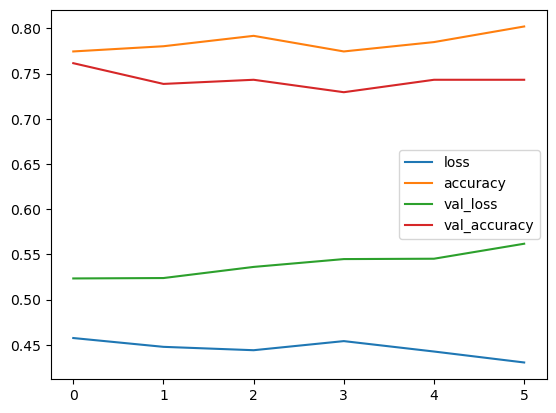

In [48]:
pd.DataFrame(history.history).plot()

In [ ]:
Q19. Evaluate the model's performance using the test data.

In [49]:
model_clf.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7757


[0.5161536931991577, 0.7757353186607361]

## Addiitonal details

In [ ]:
## loading check point model

In [50]:
## loading check point model
ckpt_model=tf.keras.models.load_model(CKPT_path)

In [51]:
history=ckpt_model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/30
28/28 [==============================] - 1s 13ms/step - loss: 0.4929 - accuracy: 0.7606 - val_loss: 0.5288 - val_accuracy: 0.7477
Epoch 2/30
28/28 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.7583 - val_loss: 0.5144 - val_accuracy: 0.7477
Epoch 3/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.7825 - val_loss: 0.5287 - val_accuracy: 0.7431
Epoch 4/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4613 - accuracy: 0.7848 - val_loss: 0.5291 - val_accuracy: 0.7477
Epoch 5/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.7710 - val_loss: 0.5448 - val_accuracy: 0.7431
Epoch 6/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.7802 - val_loss: 0.5522 - val_accuracy: 0.7523
Epoch 7/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.7871 - val_loss: 0.5320 - val_accuracy: 0.7339


In [52]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.492920,0.760644,0.528785,0.747706
1,0.474814,0.758343,0.514385,0.747706
2,0.461762,0.782509,0.528749,0.743119
3,0.461323,0.784810,0.529068,0.747706
4,0.451928,0.771001,0.544813,0.743119
5,0.466375,0.780207,0.552185,0.752294
6,0.442074,0.787112,0.531952,0.733945


In [53]:
ckpt_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7353


[0.5240281820297241, 0.7352941036224365]